In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import polyphase as phase
import matplotlib.pyplot as plt


## Result 1: Plot three different types of phase diagrams

Computation took 1.54s
Computation took 4.69s


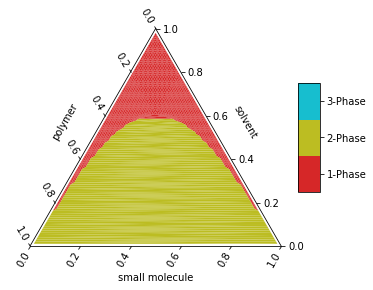

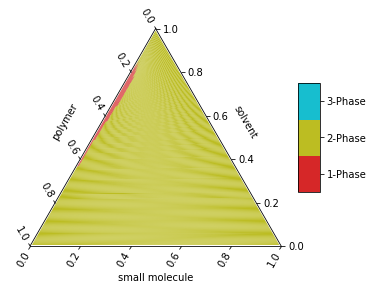

In [3]:
# type 1: classic parabola ternary
M = [5,5,1]
chi = [1, 0.5, 0.5]
f = lambda x : phase.flory_huggins(x, M, chi)
engine = phase.PHASE(f,100,3)
engine.compute(use_parallel=False, verbose=False, lift_label=True)
phase.plot_mpltern(engine.grid, engine.simplices, engine.num_comps)
plt.savefig('../figures/final/result1_type1PD.png', dpi=400, bbox_inches='tight')

# type 2: One phase region near the polymer axis
M = [946,12,1]
chi = [0.472689,0.565626,0.651095]
f = lambda x : phase.flory_huggins(x, M, chi)
engine = phase.PHASE(f,200,3)
engine.compute(use_parallel=False, verbose=False, lift_label=True)
phase.plot_mpltern(engine.grid, engine.simplices, engine.num_comps)
plt.savefig('../figures/final/result1_type2PD.png', dpi=400, bbox_inches='tight')


## Hyper parameter search plot

dx=100, Delta=5
dx=100, Delta=10
dx=100, Delta=20
dx=200, Delta=5
dx=200, Delta=10
dx=200, Delta=20
dx=300, Delta=5
dx=300, Delta=10
dx=300, Delta=20


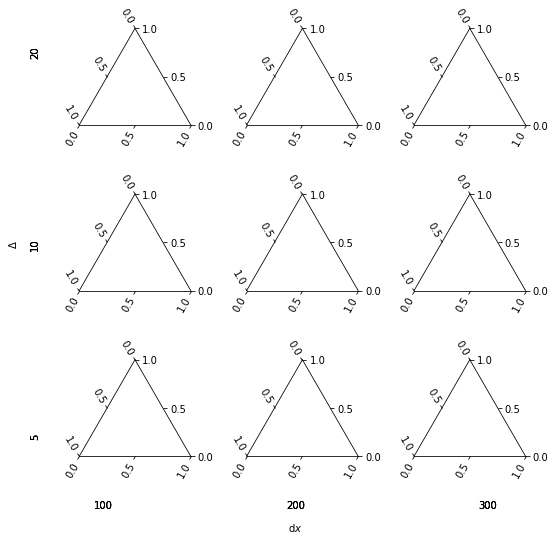

In [5]:
M = [5,5,1]
chi = [1, 0.5, 0.5]
f = lambda x : phase.flory_huggins(x, M, chi)
dxs = [100,200,300]
Deltas = [5,10,20]
fig,axs = plt.subplots(3,3,subplot_kw={'projection':'ternary'}, figsize=(8,8))
fig.subplots_adjust(wspace=0.5, hspace=0.6)
label_spacing = [1/6,3/6,5/6]
for i,dx in enumerate(dxs):
    for j, Delta in enumerate(Deltas):
#         engine = phase.PHASE(f,dx,3)
#         engine.compute(use_parallel=True, verbose=False,
#                        thresh_scale=Delta, lift_label=True)
#         ax, cbar = phase.plot_mpltern(engine.grid, engine.simplices, engine.num_comps, ax=axs[i,j])
#         ax.set_tlabel('')
#         ax.set_llabel('')
#         ax.set_rlabel('')
#         cbar.remove()
        fig.text(label_spacing[i], 0.04, '{}'.format(dx), ha='center')
        fig.text(0.04, label_spacing[j], '{}'.format(Delta), va='center', rotation='vertical')
        print('dx={}, Delta={}'.format(dx, Delta))
#         break
#     break
fig.text(0.5, 0.0, r'd$x$', ha='center')
fig.text(0.0, 0.5, r'$\Delta$', va='center', rotation='vertical')
plt.savefig('../figures/final/hyperparams.png', dpi=400, bbox_inches='tight')

Text(0.5, 1.0, 'd$x$=300;$\\Delta$=5')

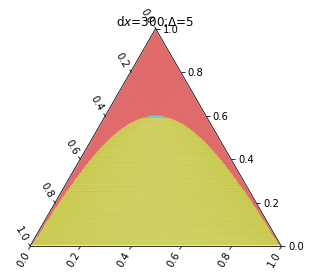

In [14]:
ax, cbar = phase.plot_mpltern(engine.grid, engine.simplices, engine.num_comps)
ax.set_tlabel('')
ax.set_llabel('')
ax.set_rlabel('')
cbar.remove()
ax.set_title(r'd$x$={};$\Delta$={}'.format(dx, Delta), pad=1)